# California Housing (K-means)

---

**K-Means**

The **K-Means** algorithm is a clustering technique that aims to divide a dataset into K clusters (defined as input parameter), so that points within each cluster are similar to each other and different from points in other clusters.

It is an iterative process composed of several steps:

- `Initialization`. The process begins by defining K random points in the data set as initial centroids. The centroids are representative points that will serve as the initial centers of each cluster.

- `Assignment of points to clusters`. Each point in the data set is assigned to the cluster whose centroid is the closest. This is done by calculating the distance between each point and the centroids, and assigning the point to the cluster whose centroid has the smallest distance. The distances used and available are the ones we studied in the KNN model module and can be found here.

- `Centroid update`. Once all points are assigned to their corresponding clusters, the centroids are updated by recalculating their position as the average of all points assigned to that cluster. This step relocates the centroids to the geometric center of each cluster.

- `Iteration`. Steps 2 and 3 are repeated until the centroids no longer change significantly and the points are stable in their clusters. That is, the algorithm continues to assign and update points until convergence is reached.

- `Result`. Once the algorithm has converged, the points in the data set are grouped into K clusters or groups, and each cluster is represented by its centroid. The groups obtained represent sets of similar points.

---

Imported Libraries

In [17]:
# Data processing
# ==================================================================================
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pickle import dump

# Preprocessing and modeling
# ==================================================================================
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Charts
# ==================================================================================
import matplotlib.pyplot as plt
import seaborn as sns

---

## Step 1: Loading the dataset

In [18]:
_df_ = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
_df_.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


>NOTE:  In this case, we are only interested in the `Latitude`, `Longitude` and `MedInc` columns.

In [19]:
# We are only interested in the `Latitude`, `Longitude` and `MedInc` columns.

df= _df_[['Latitude', 'Longitude', 'MedInc']]

df.head(3)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574


**Description and types of Data**

- `Latitude` --> <i>Numerical</i>

- `Longitude` --> <i>Numerical</i>

- `MedInc` --> <i>Numerical</i>

---

## Step 2: Study of variables and their content

In [20]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 20640 Rows and 3 Columns


In [21]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [22]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

Series([], dtype: int64)

The number of null variables are 0


- ### 2.1 Divide the dataset into train and test

Be sure to conveniently split the dataset into `train` and `test` as we have seen in previous lessons. Although these sets are not used to obtain statistics(we don´t need `y` to compare), you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [23]:
# Train - Test - Split
# ===============================================================================
def split(dataset ,
          # target, # In Unsupervised Learning we don`t have target
             test_size=0.2,
               random_state=42):
  
  X = dataset # dataset
#  y = df[target] # Target

  X_train, X_test = train_test_split(X,
                                      # y, # In Unsupervised Learning we don`t have target
                                        test_size = test_size,
                                          random_state = random_state)

  return X_train, X_test

In [24]:
X_train, X_test = split(df)

X_train.head(3)

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563


---

## Step 3: Build a K-means

Classify the data into **6 clusters** using the **K-Means model**. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

In [25]:
# Training the model

model = KMeans (n_clusters = 6,
                    random_state=42)

model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [26]:
y_train = list(model.labels_)

# Create a new column called `cluster` in X_train
X_train['cluster'] = y_train

X_train.head(3)

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1


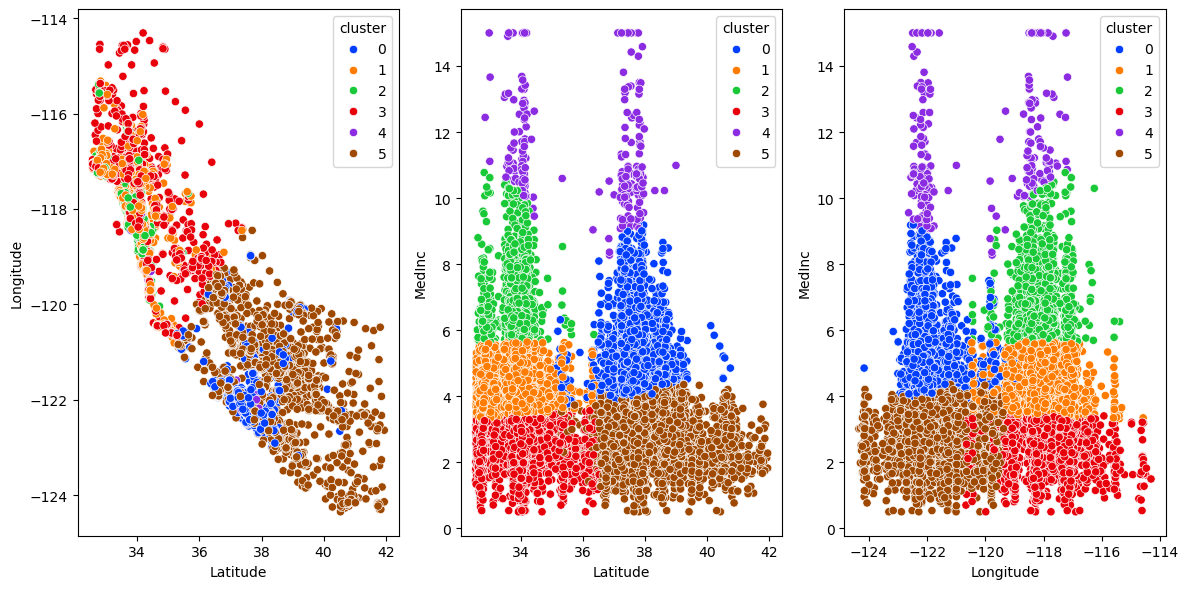

In [27]:
fig, axis = plt.subplots(1,3, figsize = (12,6))

sns.scatterplot(ax = axis[0],
                 data = X_train,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright")

sns.scatterplot(ax = axis[1],
                 data = X_train,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright")

sns.scatterplot(ax = axis[2],
                 data = X_train,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright")

plt.tight_layout()

plt.show()

-----------**Conclusion**-----------

- `Latitude` vs `Longitude`: Clusters are shown on a map-like distribution.

- `Latitude` vs `Median Income (MedInc)`: Clusters based on income trends by latitude.

- `Longitude` vs `Median Income (MedInc)`: Clusters showing income variations by longitude.


>NOTE: Each color represents a distinct cluster.

---

# Step 4: Predict with the test set

Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not

In [28]:
y_test = list(model.predict(X_test))

# Create a new column called `cluster` in X_test
X_test["cluster"] = y_test

X_test.head(3)

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5


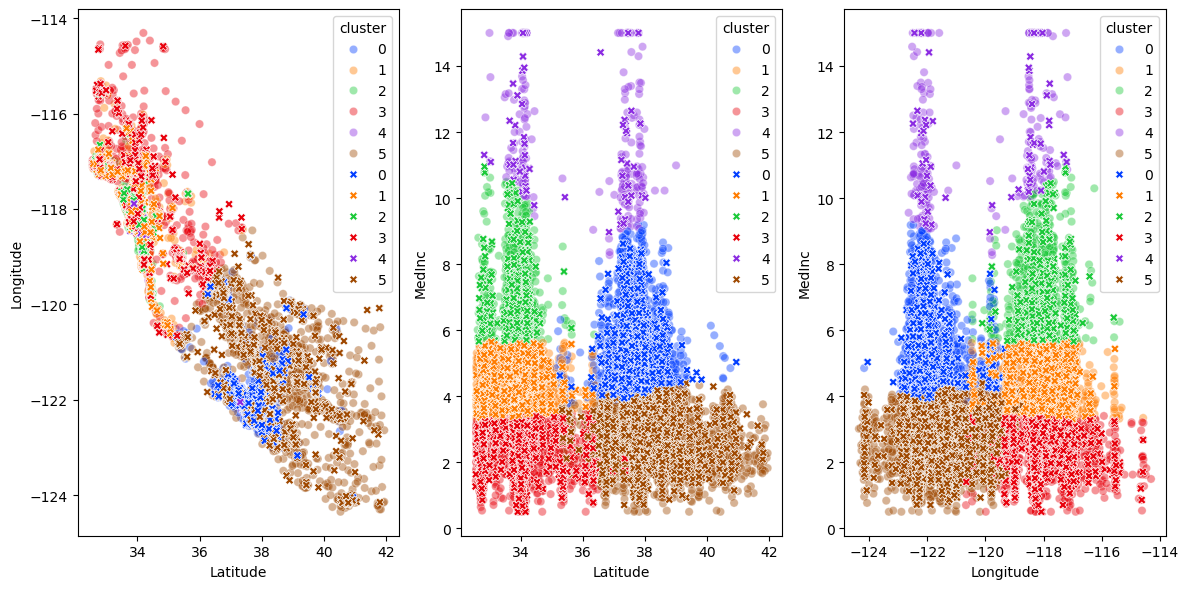

In [29]:
fig, axis = plt.subplots(1,3, figsize = (12,6))

# X_train
# =================================================================

sns.scatterplot(ax = axis[0],
                 data = X_train,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright", alpha = 0.42)

sns.scatterplot(ax = axis[1],
                 data = X_train,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright", alpha = 0.42)

sns.scatterplot(ax = axis[2],
                 data = X_train,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright", alpha = 0.42)

# X_test
# =================================================================

sns.scatterplot(ax = axis[0],
                 data = X_test,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright",
                           marker = "X")

sns.scatterplot(ax = axis[1],
                 data = X_test,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright",
                           marker = "X")

sns.scatterplot(ax = axis[2],
                 data = X_test,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright",
                           marker = "X")

plt.tight_layout()


plt.show()

-----------**Conclusion**-----------

---

## Step 4: Train a supervised classification model

Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

In [30]:
model_supervised = DecisionTreeClassifier(random_state = 42)
model_supervised.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

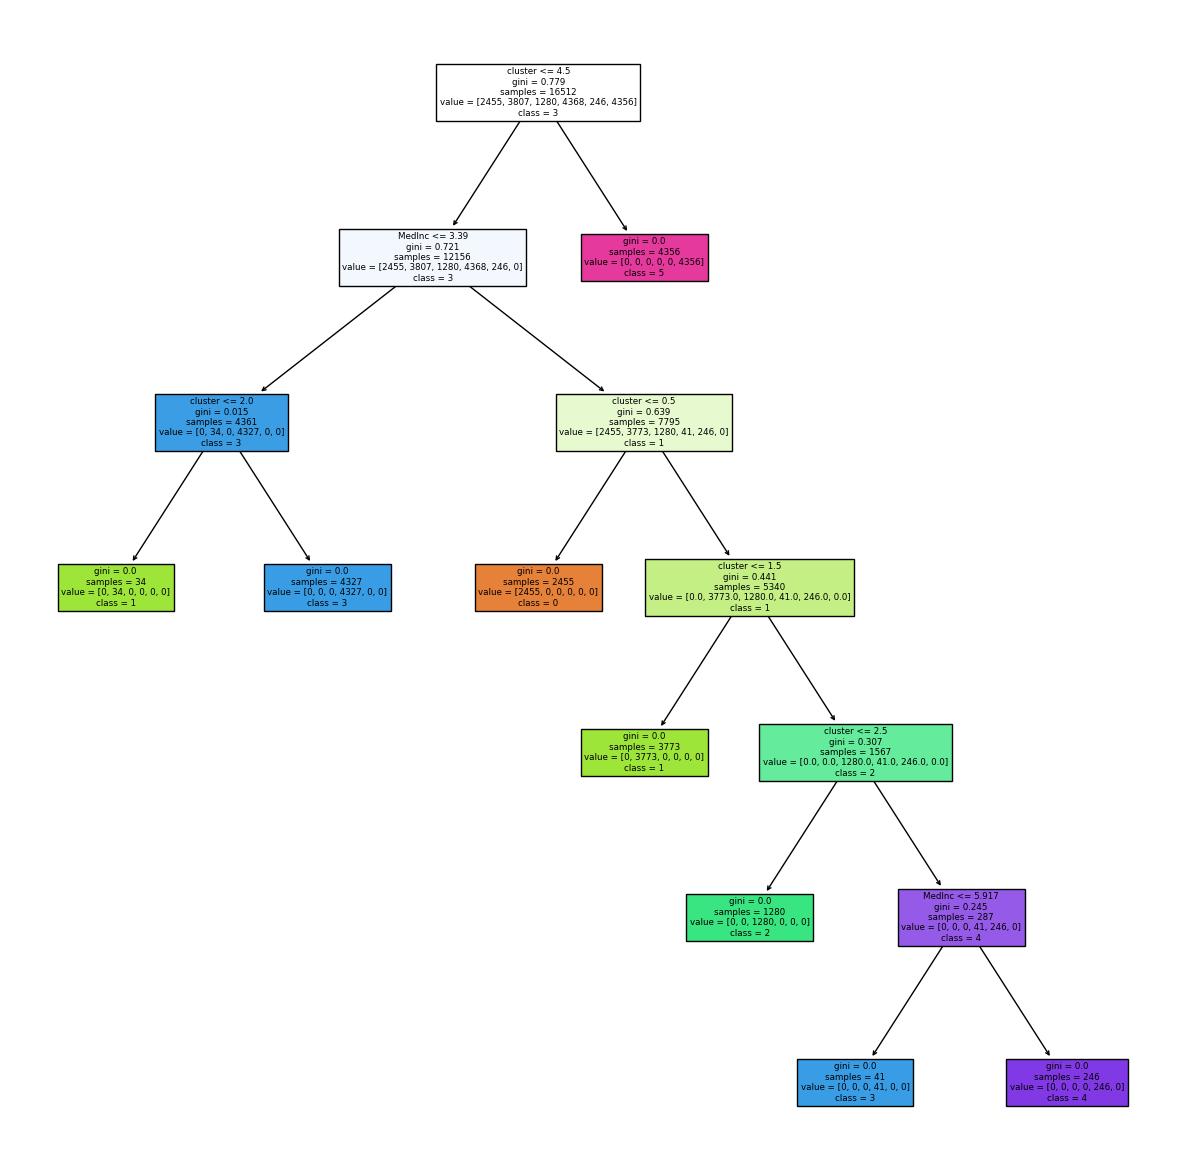

In [31]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_supervised, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [32]:
y_pred = model_supervised.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

In [33]:
acc_score = accuracy_score(y_test, y_pred)

print(f"The accuracy score is: {acc_score}")

The accuracy score is: 1.0


---

## Step 6: Save the models

In [ ]:
# Unsupervised Model
# ==========================================================================================
dump(model, open("../models/k-means_Random_State_42.sav", "wb"))

# Supervised Model
# ==========================================================================================
dump(model_supervised, open("../models/decision_tree_classifier_Random_State_42.sav", "wb"))